In [1]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
df = pd.read_csv("Cluster 2.csv")

In [3]:
df.head()

id  host_response_time host_response_rate  host_is_superhost  \
0  17691071             unknown            unknown                0.0   
1   9167632             unknown            unknown                0.0   
2   4346575             unknown            unknown                0.0   
3   8608507  within a few hours               100%                0.0   
4   4931407             unknown            unknown                0.0   

   host_listings_count  host_identity_verified           Neighbourhood  \
0                    1                     0.0             Moabit West   
1                    2                     1.0    Tempelhofer Vorstadt   
2                    1                     1.0  Frankfurter Allee Nord   
3                    1                     0.0             Moabit West   
4                    1                     0.0              Kantstraße   

  property_type        room_type  accommodates  ...  time_since_last_review  \
0     Apartment     Private room             2  ...             6-12 months   
1     Apartment  Entire home/apt             4  ...             6-12 months   
2     Apartment     Private room             3  ...                 1+ year   
3     Apartment  Entire home/apt             2  ...             6-12 months   
4     Apartment     Private room             1  ...              2-6 months   

  occupancy_last_year  Bakery  Bar  Cafe  Restaurant  Supermarket  price  LTV  \
0                 0.0       1    2     4           9            2  195.0  0.0   
1                 0.0       0    6     4          12            0  150.0  0.0   
2                 0.0       0    5     2          11            0  110.0  0.0   
3                 0.0       1    2     4           9            2   85.0  0.0   
4                 0.0       1    1     2          15            0  129.0  0.0   

  LTV_potential  
0           Low  
1           Low  
2           Low  
3           Low  
4           Low  

[5 rows x 64 columns]

In [4]:
a = df.loc[df['LTV_potential']=='Low']
a.head()

id  host_response_time host_response_rate  host_is_superhost  \
0  17691071             unknown            unknown                0.0   
1   9167632             unknown            unknown                0.0   
2   4346575             unknown            unknown                0.0   
3   8608507  within a few hours               100%                0.0   
4   4931407             unknown            unknown                0.0   

   host_listings_count  host_identity_verified           Neighbourhood  \
0                    1                     0.0             Moabit West   
1                    2                     1.0    Tempelhofer Vorstadt   
2                    1                     1.0  Frankfurter Allee Nord   
3                    1                     0.0             Moabit West   
4                    1                     0.0              Kantstraße   

  property_type        room_type  accommodates  ...  time_since_last_review  \
0     Apartment     Private room             2  ...             6-12 months   
1     Apartment  Entire home/apt             4  ...             6-12 months   
2     Apartment     Private room             3  ...                 1+ year   
3     Apartment  Entire home/apt             2  ...             6-12 months   
4     Apartment     Private room             1  ...              2-6 months   

  occupancy_last_year  Bakery  Bar  Cafe  Restaurant  Supermarket  price  LTV  \
0                 0.0       1    2     4           9            2  195.0  0.0   
1                 0.0       0    6     4          12            0  150.0  0.0   
2                 0.0       0    5     2          11            0  110.0  0.0   
3                 0.0       1    2     4           9            2   85.0  0.0   
4                 0.0       1    1     2          15            0  129.0  0.0   

  LTV_potential  
0           Low  
1           Low  
2           Low  
3           Low  
4           Low  

[5 rows x 64 columns]

In [5]:
a['occupancy_last_year'].mean()

0.4014856511748044

In [6]:
a['price'].mean()

49.03843088462964

In [33]:
b = df.loc[df['LTV_potential']=='High']
b

KeyError: 'LTV_potential'

In [8]:
b['occupancy_last_year'].mean()

0.9594271481942725

In [9]:
b['price'].mean()

74.994450395536

In [10]:
len(b.index)

1210

In [11]:
c = df.loc[df['LTV_potential']=='Mid']
c.head()

id  host_response_time host_response_rate  host_is_superhost  \
769  22398221             unknown            unknown                0.0   
770   1573151  within a few hours               100%                1.0   
771  22286909      within an hour               100%                0.0   
772  19744206             unknown            unknown                0.0   
773  26106550             unknown            unknown                0.0   

     host_listings_count  host_identity_verified             Neighbourhood  \
769                    2                     0.0      Tempelhofer Vorstadt   
770                    1                     1.0      Tempelhofer Vorstadt   
771                    1                     1.0      südliche Luisenstadt   
772                    1                     1.0            Pankow Zentrum   
773                    1                     0.0  Neuköllner Mitte/Zentrum   

    property_type        room_type  accommodates  ...  time_since_last_review  \
769     Apartment     Private room             2  ...             6-12 months   
770     Apartment     Private room             2  ...              2-6 months   
771     Apartment     Private room             1  ...             6-12 months   
772     Apartment  Entire home/apt             2  ...             6-12 months   
773     Apartment     Private room             1  ...             6-12 months   

    occupancy_last_year  Bakery  Bar  Cafe  Restaurant  Supermarket  \
769            0.989041       0    6     4          12            0   
770            0.917808       0    6     4          12            0   
771            0.994521       0    5     7           7            0   
772            0.646575       0    0     1           2            1   
773            0.649315       0    6     5           9            0   

         price        LTV LTV_potential  
769  26.000000  25.715068           Mid  
770  28.133333  25.821005           Mid  
771  26.000000  25.857534           Mid  
772  40.000000  25.863014           Mid  
773  40.000000  25.972603           Mid  

[5 rows x 64 columns]

In [12]:
c['occupancy_last_year'].mean()

0.8981295816364311

In [13]:
c['price'].mean()

43.355659018971885

In [14]:
#LTV_potential = Low -> 1
df.loc[df['LTV_potential'].str.contains('Low'),'LTV_potential_num'] = 1

#LTV_potential = Mid -> 2
df.loc[df['LTV_potential'].str.contains('Mid'),'LTV_potential_num'] = 2

#LTV_potential = High -> 3
df.loc[df['LTV_potential'].str.contains('High'),'LTV_potential_num'] = 3

In [15]:
numerical_columns = ['accommodates', 'bathrooms','guests_included',
                     'cleaning_fee', 'extra_people', 'host_days_active', 
                     'host_listings_count', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'security_deposit','summary_length','description_length',
                    'neighborhood_overview_length']

In [16]:
 Log transforming columns
for col in numerical_columns:
    df[col] = df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df[col] = np.log(df[col])

SyntaxError: invalid syntax (<ipython-input-16-7f2c669492de>, line 1)

# Dropping variables

Here we drop 'LTV_potential' (categorical string), 'price' and 'occupancy_last_year' because they are used to calculate the measure

In [17]:
df.drop(['price','occupancy_last_year','LTV','LTV_potential'],axis=1,inplace=True)

In [18]:
df.head()

id  host_response_time host_response_rate  host_is_superhost  \
0  17691071             unknown            unknown                0.0   
1   9167632             unknown            unknown                0.0   
2   4346575             unknown            unknown                0.0   
3   8608507  within a few hours               100%                0.0   
4   4931407             unknown            unknown                0.0   

   host_listings_count  host_identity_verified           Neighbourhood  \
0                    1                     0.0             Moabit West   
1                    2                     1.0    Tempelhofer Vorstadt   
2                    1                     1.0  Frankfurter Allee Nord   
3                    1                     0.0             Moabit West   
4                    1                     0.0              Kantstraße   

  property_type        room_type  accommodates  ...  nature_and_views  \
0     Apartment     Private room             2  ...               0.0   
1     Apartment  Entire home/apt             4  ...               0.0   
2     Apartment     Private room             3  ...               0.0   
3     Apartment  Entire home/apt             2  ...               1.0   
4     Apartment     Private room             1  ...               0.0   

  bedroom_necessities  time_since_first_review  time_since_last_review  \
0                 0.0                2-3 years             6-12 months   
1                 0.0                2-3 years             6-12 months   
2                 0.0                2-3 years                 1+ year   
3                 1.0                2-3 years             6-12 months   
4                 1.0                2-3 years              2-6 months   

   Bakery  Bar  Cafe  Restaurant  Supermarket LTV_potential_num  
0       1    2     4           9            2               1.0  
1       0    6     4          12            0               1.0  
2       0    5     2          11            0               1.0  
3       1    2     4           9            2               1.0  
4       1    1     2          15            0               1.0  

[5 rows x 61 columns]

# Convert Categorical variables to dummies

In [19]:
# Now generating dummies for categorical varibles to enable multi-collinearity analysis
dummies_df = pd.get_dummies(df)
dummies_df.head()

id  host_is_superhost  host_listings_count  host_identity_verified  \
0  17691071                0.0                    1                     0.0   
1   9167632                0.0                    2                     1.0   
2   4346575                0.0                    1                     1.0   
3   8608507                0.0                    1                     0.0   
4   4931407                0.0                    1                     0.0   

   accommodates  bathrooms  security_deposit  cleaning_fee  guests_included  \
0             2        1.0                 0             0                1   
1             4        1.0                 0            50                2   
2             3        1.0                 0            10                2   
3             2        1.0               500            40                1   
4             1        1.0                 0            15                1   

   extra_people  ...  cancellation_policy_moderate  \
0             0  ...                             1   
1            20  ...                             0   
2            30  ...                             1   
3             0  ...                             1   
4             0  ...                             0   

   cancellation_policy_strict_14_with_grace_period  \
0                                                0   
1                                                1   
2                                                0   
3                                                0   
4                                                0   

   time_since_first_review_0-6 months  time_since_first_review_1-2 years  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   

   time_since_first_review_2-3 years  time_since_first_review_4+ years  \
0                                  1                                 0   
1                                  1                                 0   
2                                  1                                 0   
3                                  1                                 0   
4                                  1                                 0   

   time_since_first_review_6-12 months  time_since_last_review_1+ year  \
0                                    0                               0   
1                                    0                               0   
2                                    0                               1   
3                                    0                               0   
4                                    0                               0   

   time_since_last_review_2-6 months  time_since_last_review_6-12 months  
0                                  0                                   1  
1                                  0                                   1  
2                                  0                                   0  
3                                  0                                   1  
4                                  1                                   0  

[5 rows x 169 columns]

In [20]:
pd.set_option('display.max_columns', None)
dummies_df.head()

id  host_is_superhost  host_listings_count  host_identity_verified  \
0  17691071                0.0                    1                     0.0   
1   9167632                0.0                    2                     1.0   
2   4346575                0.0                    1                     1.0   
3   8608507                0.0                    1                     0.0   
4   4931407                0.0                    1                     0.0   

   accommodates  bathrooms  security_deposit  cleaning_fee  guests_included  \
0             2        1.0                 0             0                1   
1             4        1.0                 0            50                2   
2             3        1.0                 0            10                2   
3             2        1.0               500            40                1   
4             1        1.0                 0            15                1   

   extra_people  minimum_nights  maximum_nights  number_of_reviews  \
0             0               2               6                 18   
1            20              61            1125                 39   
2            30              60              90                  9   
3             0              12              80                  9   
4             0               1            1125                  7   

   instant_bookable  calculated_host_listings_count  summary_length  \
0                 1                               1             479   
1                 0                               2             242   
2                 0                               1             270   
3                 0                               1             487   
4                 0                               1             246   

   description_length  neighborhood_overview_length  host_verifications_count  \
0                 978                            51                         8   
1                 919                           370                         5   
2                 726                           170                         5   
3                1000                             0                         2   
4                 761                           133                         2   

   FB_verification  email_verification  phone_verification  host_days_active  \
0                1                   1                   1               860   
1                0                   1                   1              2495   
2                0                   1                   1              1771   
3                0                   1                   1              1602   
4                0                   1                   1              1664   

   shower_necessities   tv  smoke_detector  pets_allowed  child_friendly  \
0                 1.0  1.0             0.0           0.0             1.0   
1                 1.0  1.0             0.0           0.0             1.0   
2                 1.0  1.0             0.0           1.0             1.0   
3                 1.0  1.0             0.0           0.0             0.0   
4                 1.0  1.0             0.0           0.0             0.0   

   coffee_machine  kitchen_basics  white_goods  elevator  fire_protection  \
0             0.0             1.0          1.0       0.0              1.0   
1             0.0             1.0          1.0       1.0              0.0   
2             0.0             1.0          1.0       1.0              0.0   
3             1.0             1.0          1.0       0.0              0.0   
4             0.0             1.0          1.0       1.0              0.0   

   parking  host_greeting  long_term_stays  smoking_allowed  nature_and_views  \
0      0.0            1.0              0.0              1.0               0.0   
1      1.0            1.0              1.0              0.0               0.0   
2      0.0            0.0              0.0              1.0               0.0   

In [21]:
print(len(dummies_df.columns))

169


In [22]:
# Separating X and y
X = dummies_df.drop(['LTV_potential_num','id'], axis=1)
y = dummies_df.LTV_potential_num

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# instantied the model
model=xgb.XGBClassifier()

# train the model on training data
model.fit(X, y)

# make predictions using tesst data
y_predict=model.predict(X)

# evaluate the predictions
accuracy = accuracy_score(y, y_predict)

print(f'XGBoost - Accuracy {accuracy*100:.3f}%')


XGBoost - Accuracy 70.971%


In [24]:
ft_weights_xgb_reg = pd.DataFrame(model.feature_importances_, columns=['weight'], index=X.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg.head(30)

weight
room_type_Entire home/apt              0.093445
host_response_rate_100%                0.031920
host_response_time_unknown             0.030004
minimum_nights                         0.025319
long_term_stays                        0.024426
accommodates                           0.018665
host_listings_count                    0.017679
time_since_last_review_2-6 months      0.016333
review_scores_rating_95-100/100        0.016181
time_since_first_review_4+ years       0.015292
number_of_reviews                      0.015044
host_response_time_within an hour      0.014908
Bar                                    0.014341
host_response_rate_50-89%              0.014263
Neighbourhood_Moabit West              0.014116
calculated_host_listings_count         0.013918
guests_included                        0.011884
child_friendly                         0.011012
review_scores_rating_80-94/100         0.010920
cleaning_fee                           0.010704
Neighbourhood_Neue Kantstraße          0.010672
host_greeting                          0.010635
extra_people                           0.010612
Neighbourhood_Prenzlauer Berg Süd      0.010535
Supermarket                            0.010114
host_response_time_a few days or more  0.010043
Neighbourhood_Brunnenstr. Süd          0.009761
review_scores_communication_0-8/10     0.009478
tv                                     0.009396
Neighbourhood_Rixdorf                  0.009365

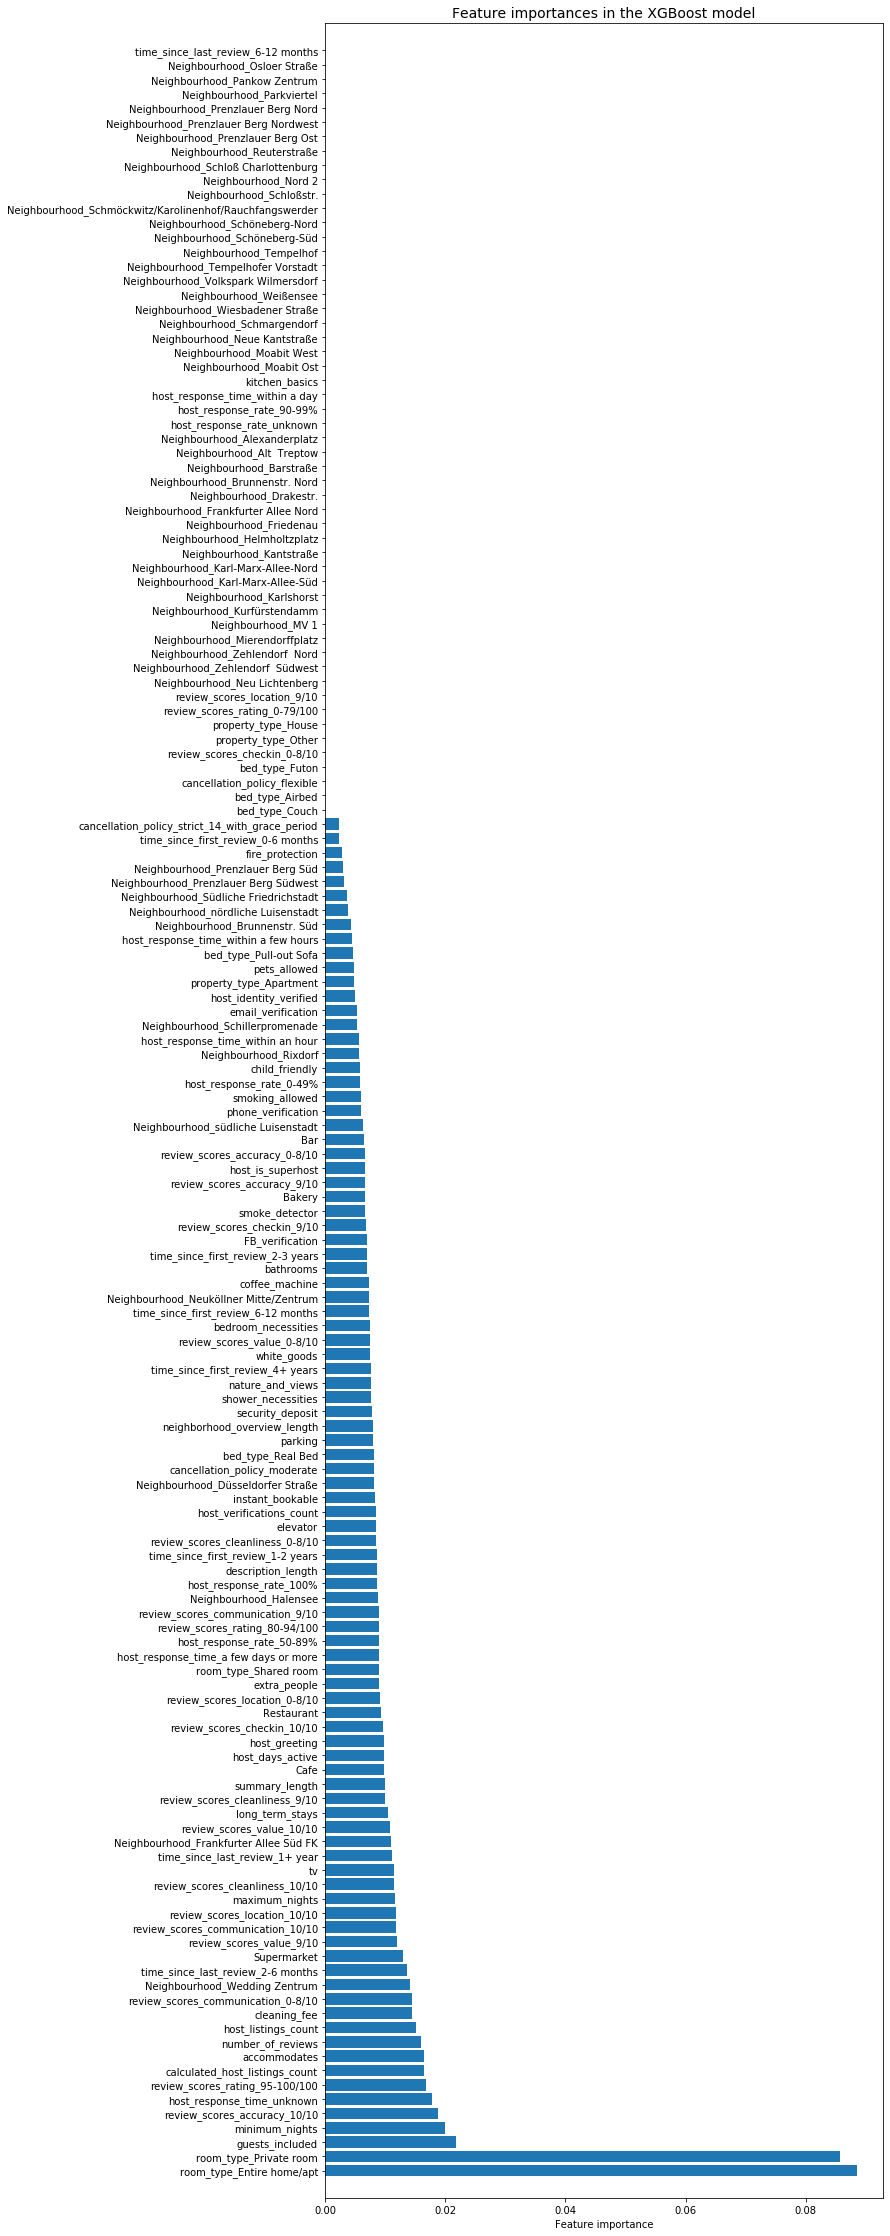

In [25]:
# Plotting feature importances
plt.figure(figsize=(10,40))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

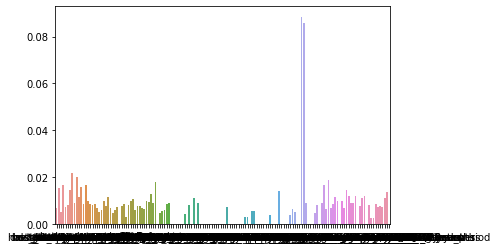

In [26]:
sns.barplot(x=X.columns, y=model.feature_importances_)

In [26]:
b['tv'].mean()

0.5983471074380166

In [27]:
c['tv'].mean()

0.4789189189189189

In [28]:
b['minimum_nights'].mean()

4.937190082644628

In [29]:
c['minimum_nights'].mean()

7.514594594594595

In [35]:
test = c.loc[c['tv']==0]
test

id  host_response_time host_response_rate  host_is_superhost  \
769   22398221             unknown            unknown                0.0   
771   22286909      within an hour               100%                0.0   
772   19744206             unknown            unknown                0.0   
774   19530452             unknown            unknown                1.0   
776   17552308             unknown            unknown                0.0   
...        ...                 ...                ...                ...   
1681  18715171  within a few hours               100%                0.0   
1682  19177015             unknown            unknown                0.0   
1686  20369353      within an hour               100%                1.0   
1687  10030787  a few days or more              0-49%                0.0   
1689   2470520  a few days or more              0-49%                0.0   

      host_listings_count  host_identity_verified             Neighbourhood  \
769                     2                     0.0      Tempelhofer Vorstadt   
771                     1                     1.0      südliche Luisenstadt   
772                     1                     1.0            Pankow Zentrum   
774                     1                     0.0         Schillerpromenade   
776                     1                     1.0   Südliche Friedrichstadt   
...                   ...                     ...                       ...   
1681                    2                     1.0  Frankfurter Allee Süd FK   
1682                    1                     1.0      Prenzlauer Berg Nord   
1686                    1                     0.0           Wedding Zentrum   
1687                    1                     1.0      Tempelhofer Vorstadt   
1689                    1                     0.0           Brunnenstr. Süd   

     property_type        room_type  accommodates  bathrooms  bed_type  \
769      Apartment     Private room             2        1.5  Real Bed   
771      Apartment     Private room             1        1.0  Real Bed   
772      Apartment  Entire home/apt             2        1.0  Real Bed   
774      Apartment     Private room             2        1.0  Real Bed   
776      Apartment     Private room             2        1.0  Real Bed   
...            ...              ...           ...        ...       ...   
1681     Apartment  Entire home/apt             3        1.0  Real Bed   
1682     Apartment     Private room             2        1.0  Real Bed   
1686     Apartment     Private room             2        1.0  Real Bed   
1687     Apartment  Entire home/apt             2        1.0  Real Bed   
1689     Apartment  Entire home/apt             2        1.0  Real Bed   

      security_deposit  cleaning_fee  guests_included  extra_people  \
769                  0             0                1             0   
771                  0            20                1            10   
772                  0            20                1             0   
774                  0             0                1             0   
776                  0             7                1            10   
...                ...           ...              ...           ...   
1681                92            25                2            10   
1682               250            35                1            15   
1686                 0            20                1            10   
1687               200            50                1            10   
1689                 0            25                1             0   

      minimum_nights  maximum_nights  number_of_reviews review_scores_rating  \
769                3              33                  6           95-100/100   
771                2              25                  5           95-100/100   
772                4               7                  4            80-94/100   
774                3              12                 13           95-100/100   
776     